<a href="https://colab.research.google.com/github/devclo/Intro-To-Artificial-Intelligence/blob/Linear-Regression-and-CNN-Assignment-(Part-1)/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Gradient Descent for Linear Regression

---



Predict the miles per gallon from the curb weight and engine size, using Stochastic Gradient Descent and a linear model with L2 regularization. You need to code up SGD yourself such as in [here](https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
# Replace 'imports-85.csv' with the actual file path if it's not in the current directory
dataset_url = "https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(dataset_url)

# Now, you can work with the 'df' DataFrame as needed
pd.set_option('display.max_columns', None)  # Show all columns
df.head(10)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,5,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [86]:
target_variable_column = df[['city-mpg']]
feature_columns = df[['curb-weight', 'engine-size']]
# Convert selected columns to a NumPy array
y = target_variable_column.values
X = feature_columns.values



In [87]:
# Split the Data 80/20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# We need to normalize the Features
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_val = (X_val - mean) / std

# Model hyperparameters
learning_rate = 0.001
l2_lambda = .01

# Build and compile the linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(l2_lambda))
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss='mean_squared_error')

# Add early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [88]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=1,
                    callbacks=[early_stop])

# Predictions
y_pred = model.predict(X_val).flatten()

# Inspect weights and bias
weights, bias = model.layers[0].get_weights()


Epoch 1/50
164/164 [==============================] - 1s 3ms/step - loss: 499.9980 - val_loss: 400.7917
Epoch 2/50
164/164 [==============================] - 0s 2ms/step - loss: 263.5208 - val_loss: 225.4603
Epoch 3/50
164/164 [==============================] - 0s 2ms/step - loss: 143.5422 - val_loss: 134.1890
Epoch 4/50
164/164 [==============================] - 0s 2ms/step - loss: 82.3244 - val_loss: 86.6718
Epoch 5/50
164/164 [==============================] - 0s 2ms/step - loss: 50.9759 - val_loss: 60.7979
Epoch 6/50
164/164 [==============================] - 0s 2ms/step - loss: 34.6047 - val_loss: 46.8075
Epoch 7/50
164/164 [==============================] - 27s 163ms/step - loss: 26.1489 - val_loss: 38.9740
Epoch 8/50
164/164 [==============================] - 0s 2ms/step - loss: 21.7577 - val_loss: 34.4862
Epoch 9/50
164/164 [==============================] - 0s 2ms/step - loss: 19.4786 - val_loss: 31.9975
Epoch 10/50
164/164 [==============================] - 0s 2ms/step - loss

In [89]:
print("Weights:", weights)
print("Bias:", bias)



Weights: [[-3.952378 ]
 [-0.7046547]]
Bias: [25.067518]


In [90]:
# Calculate RMSE and MAE
mae = tf.keras.losses.mean_absolute_error(y_val, y_pred).numpy().mean()
rmse = np.sqrt(np.mean(mse))


print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Root Mean Squared Error (RMSE): 9.49
Mean Absolute Error (MAE): 7.25


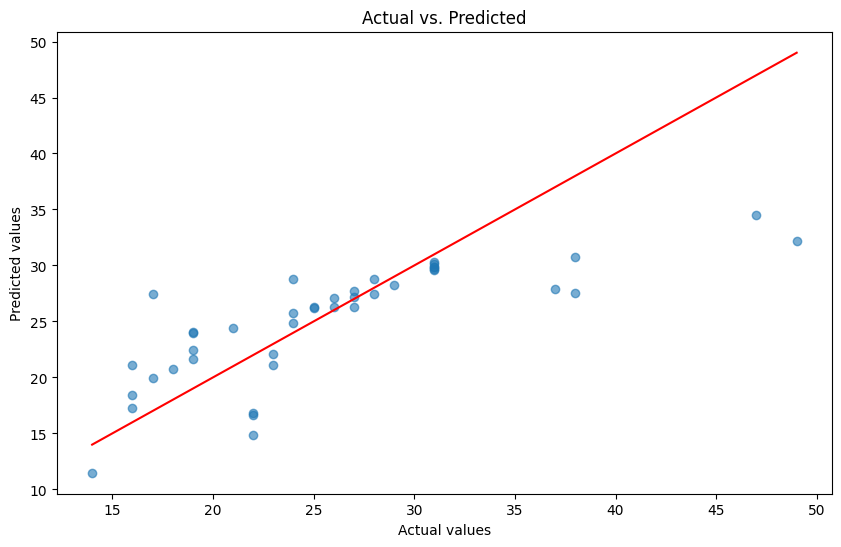

In [91]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r')
plt.show()

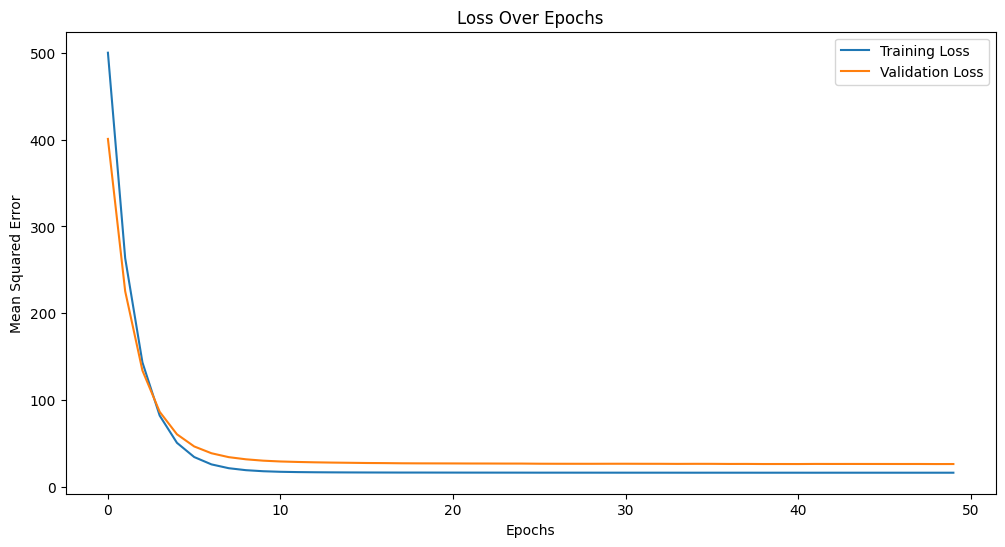

In [92]:
# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()